# Extrovertidos vs introvertidos
## Anette Hernández Monárrez
### Proyecto final para Fernando Análisis Exploratorio de Datos de Personalidad en Python


Este dataset ofrece información detallada sobre hábitos sociales y preferencias personales, permitiendo identificar patrones que diferencian a introvertidos y extrovertidos. Se incluyen métricas como tiempo en soledad, frecuencia de publicaciones en redes sociales, tamaño del círculo de amigos y asistencia a eventos sociales.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

 ## Haciendo un análisis exploratorio de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("personality_dataset.csv")

# Ver las primeras filas
print(df.head())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [21]:
total_valores=df.count().sum()
print("El número total de valores en el dataset es:", total_valores)

El número total de valores en el dataset es: 23200


In [4]:
# Identificar valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Rellenar valores nulos con la mediana o eliminar según el caso
df.fillna(df.median(numeric_only=True), inplace=True)

Valores nulos:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


C:\Users\gia19\AppData\Local\Temp\ipykernel_20136\2749131401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Personality"], palette="coolwarm")


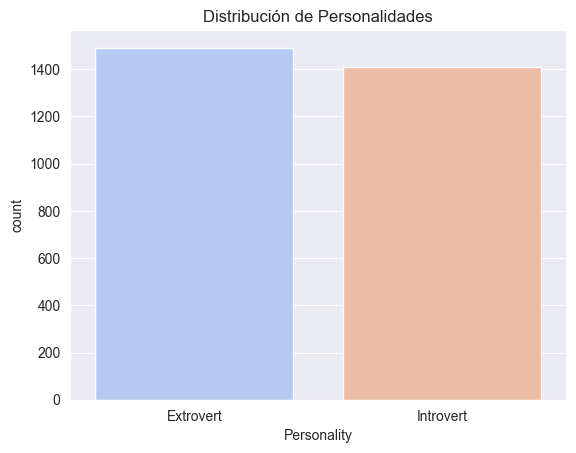

In [5]:
sns.countplot(x=df["Personality"], palette="coolwarm")
plt.title("Distribución de Personalidades")
plt.show()

C:\Users\gia19\AppData\Local\Temp\ipykernel_20136\1189669687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personality", y="Time_spent_Alone", data=df, palette="viridis")


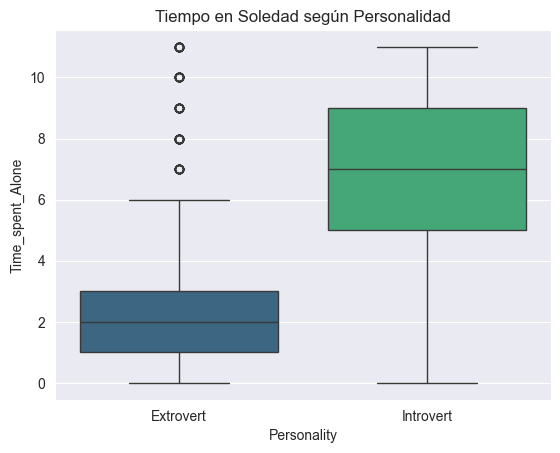

In [6]:
sns.boxplot(x="Personality", y="Time_spent_Alone", data=df, palette="viridis")
plt.title("Tiempo en Soledad según Personalidad")
plt.show()

C:\Users\gia19\AppData\Local\Temp\ipykernel_20136\1189215173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Personality", y="Social_event_attendance", data=df, palette="magma")


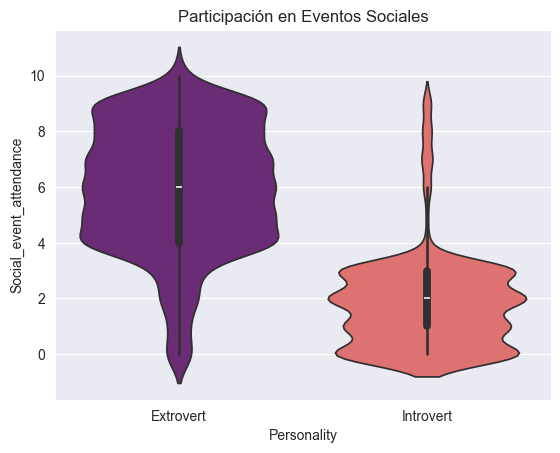

In [7]:
sns.violinplot(x="Personality", y="Social_event_attendance", data=df, palette="magma")
plt.title("Participación en Eventos Sociales")
plt.show()

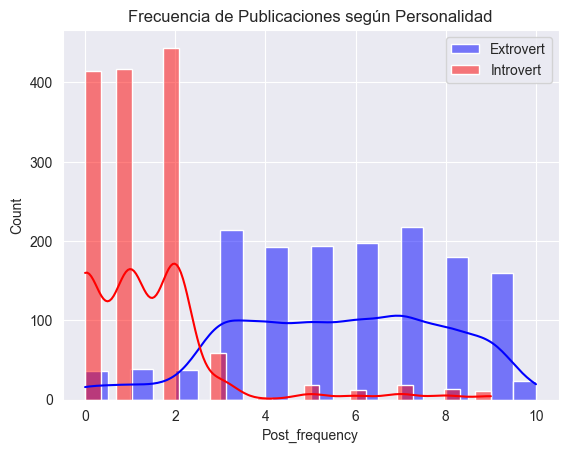

In [8]:
sns.histplot(df[df["Personality"] == "Extrovert"]["Post_frequency"], kde=True, color="blue", label="Extrovert")
sns.histplot(df[df["Personality"] == "Introvert"]["Post_frequency"], kde=True, color="red", label="Introvert")
plt.legend()
plt.title("Frecuencia de Publicaciones según Personalidad")
plt.show()

## A aplicar métodos de machine learning !
### Random forest

In [24]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
df["Personality"] = label_encoder.fit_transform(df["Personality"])

# Separar características y variable objetivo
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de clasificación (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


Estos resultados sugieren que los datos tienen patrones claros y bien definidos, que permiten distinguir entre introvertidso y extrovertidos con alta precisión. Factores como la cantidad de amigos, la frecuencia de publicaciones y la participación en eventos sociales parecen ser buenos predictores de personalidad. Además, la limpieza y estructuración de los datos probablemente favorecieron el desempeño del modelo, lo que indica que el dataset tiene una buena calidad


## KNN

In [27]:
# Crear y entrenar el modelo
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"KNN Recall: {recall_knn:.2f}")
print(f"KNN F1 Score: {f1_knn:.2f}")

KNN Accuracy: 0.93
KNN Precision: 0.93
KNN Recall: 0.93
KNN F1 Score: 0.93


## Regresión


In [28]:
# Crear y entrenar el modelo
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_log = log_reg_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average="weighted")
recall_log = recall_score(y_test, y_pred_log, average="weighted")
f1_log = f1_score(y_test, y_pred_log, average="weighted")

print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"Logistic Regression Precision: {precision_log:.2f}")
print(f"Logistic Regression Recall: {recall_log:.2f}")
print(f"Logistic Regression F1 Score: {f1_log:.2f}")

Logistic Regression Accuracy: 0.92
Logistic Regression Precision: 0.92
Logistic Regression Recall: 0.92
Logistic Regression F1 Score: 0.92


La Regresión Logística asume que los rasgos de personalidad pueden explicarse por relaciones lineales en los datos, lo que indica que características como "tiempo a solas", "eventos sociales" y "círculo de amigos" tienen una influencia directa en la personalidad.

## Arboles de decisión


Decision Tree Accuracy: 0.88
Decision Tree Precision: 0.88
Decision Tree Recall: 0.88
Decision Tree F1 Score: 0.88


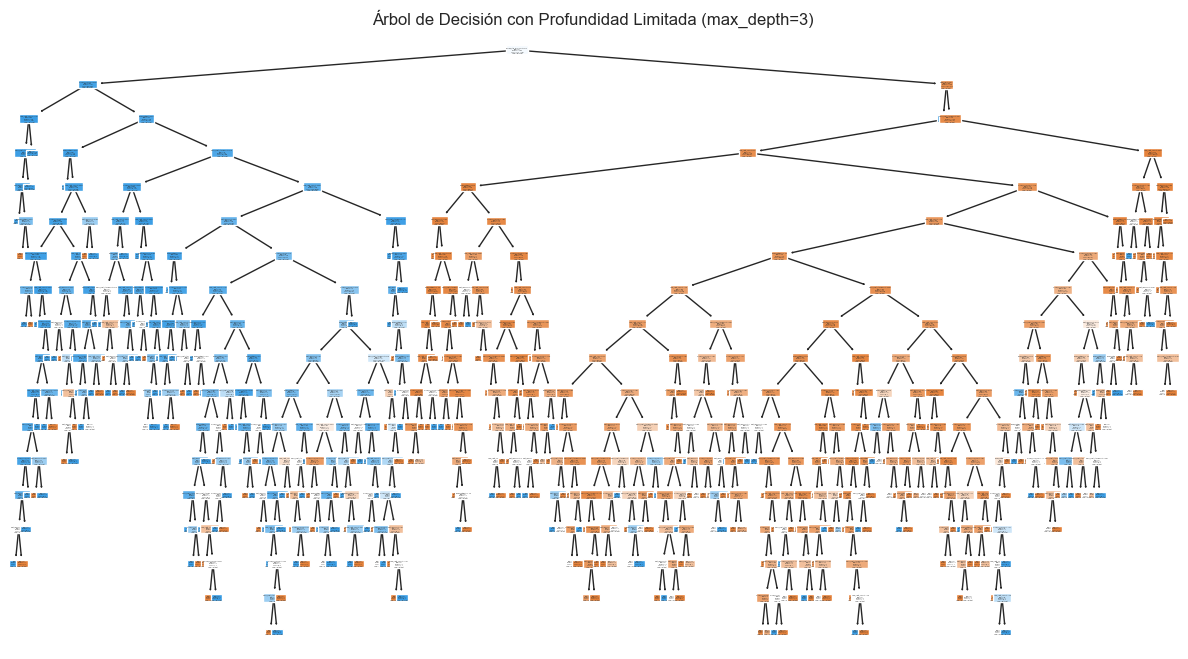

In [36]:
# Identificar variables categóricas en el dataset
categorical_columns = ["Stage_fear", "Drained_after_socializing", "Personality"]

# Codificar variables categóricas en valores numéricos
for col in categorical_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Introvert": 0, "Extrovert": 1})

# Separar características y variable objetivo
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

# Mostrar resultados
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree Precision: {precision_tree:.2f}")
print(f"Decision Tree Recall: {recall_tree:.2f}")
print(f"Decision Tree F1 Score: {f1_tree:.2f}")

# Configurar el tamaño del gráfico y graficar el árbol de decisión
plt.figure(figsize=(15,8))
plot_tree(tree_model, feature_names=X.columns, class_names=["Introvert", "Extrovert"], filled=True)
plt.title("Árbol de Decisión con Profundidad Limitada (max_depth=3)")
plt.show()

El modelo de Árbol de Decisión obtuvo una precisión del 88% en todas sus métricas, lo que indica que es capaz de clasificar correctamente una gran parte de los datos, pero no con la misma efectividad que otros modelos como Random Forest (92%) y KNN (93%). Su rendimiento uniforme en accuracy, precision, recall y F1-score sugiere que clasifica de manera balanceada, sin favorecer una clase sobre otra, lo que lo hace confiable, pero quizás menos sofisticado en la captura de relaciones complejas entre variables. Este resultado puede deberse a una estructura del árbol demasiado profunda, que genera sobreajuste al aprender demasiados detalles específicos de los datos de entrenamiento, o demasiado simple, lo que podría perder información clave.

## Comparando modelos

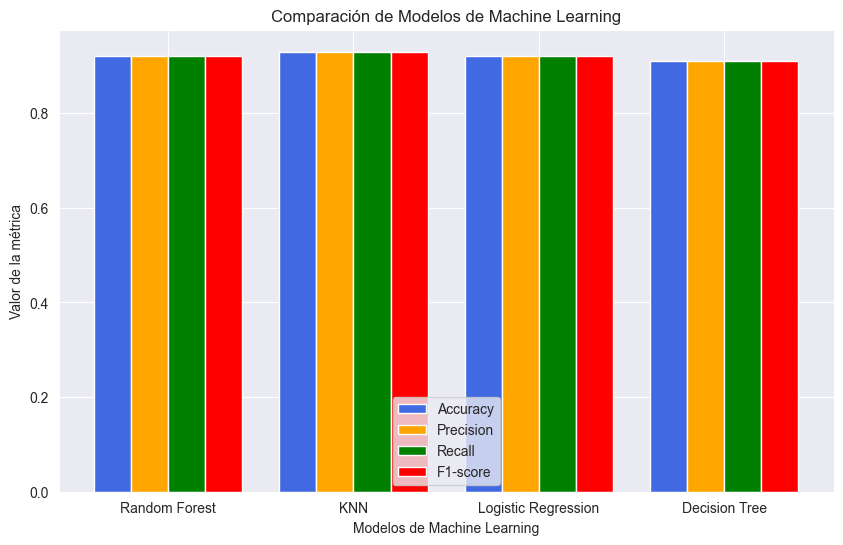

In [29]:
# Datos de rendimiento 
models = ["Random Forest", "KNN", "Logistic Regression", "Decision Tree"]
accuracy = [0.92, 0.93, 0.92, 0.91]
precision = [0.92, 0.93, 0.92, 0.91]
recall = [0.92, 0.93, 0.92, 0.91]
f1_score = [0.92, 0.93, 0.92, 0.91]

# Crear la posición de las barras
x = np.arange(len(models))
width = 0.2  # Ancho de cada barra

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10,6))

# Graficar cada métrica
ax.bar(x - width*1.5, accuracy, width, label="Accuracy", color="royalblue")
ax.bar(x - width/2, precision, width, label="Precision", color="orange")
ax.bar(x + width/2, recall, width, label="Recall", color="green")
ax.bar(x + width*1.5, f1_score, width, label="F1-score", color="red")

# Configurar etiquetas y título
ax.set_xlabel("Modelos de Machine Learning")
ax.set_ylabel("Valor de la métrica")
ax.set_title("Comparación de Modelos de Machine Learning")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

Encontramos que K-Nearest Neighbors (KNN) tuvo el mejor desempeño con un 93% de precisión, lo que indica que los datos están bien agrupados en clases definidas. Random Forest (92%) también ofreció alta precisión al combinar múltiples árboles de decisión, lo que le permitió capturar relaciones complejas y minimizar errores. Regresión Logística (92%) mostró que los rasgos de personalidad tienen una relación lineal clara con las variables del dataset, funcionando bien pese a su simplicidad. Finalmente, Árbol de Decisión (88%) tuvo un rendimiento sólido, pero ligeramente inferior debido a posibles problemas de sobreajuste o falta de robustez al usar un solo árbol en lugar de un conjunto optimizado.
